# Loan Prediction Project

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

## Cleaning & Analysis Phase

In [3]:
data = pd.read_csv('loan_data.csv')
data.head()

,Id,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,status
0,1,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3.0,13.0,0,"{'Income' 1303834.0, 'Age' 23.0, 'Experience..."
1,2,rented,no,Software_Developer,Parbhani,Maharashtra,9.0,13.0,0,"{'Income' 7574516.0, 'Age' 40.0, 'Experience..."
2,3,rented,no,Technical_writer,Alappuzha,Kerala,4.0,10.0,0,"{'Income' 3991815.0, 'Age' 66.0, 'Experience..."
3,4,rented,yes,Software_Developer,Bhubaneswar,Odisha,2.0,12.0,1,"{'Income' 6256451.0, 'Age' 41.0, 'Experience..."
4,5,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3.0,14.0,1,"{'Income' 5768871.0, 'Age' 47.0, 'Experience..."


In [4]:
df = data['status'].str.split(',',expand=True)

In [5]:
df.rename(columns = {0:'Income',1:'Age',2:'Experience',3:'Married/Single'}, inplace = True)

In [6]:
df['Income'] = df['Income'].str.replace(r"{'Income'","")

C:\Users\AHMEDA~1\AppData\Local\Temp/ipykernel_2288/4227205871.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Income'] = df['Income'].str.replace(r"{'Income'","")


In [7]:
df['Income'] = df['Income'].str.strip()

In [8]:
df['Income'] = df['Income'].astype(float)

In [9]:
df['Age'] = df['Age'].str.replace(r"Age","")

In [10]:
df['Age'] = df['Age'].str.replace(r"'' ","")

In [11]:
df['Age'] = df['Age'].str.strip()

In [12]:
df['Age'] = df['Age'].astype(float)

In [13]:
df['Experience'] = df['Experience'].str.replace(r"Experience","")

In [14]:
df['Experience'] = df['Experience'].str.replace(r"'' ","")

In [15]:
df['Experience'] = df['Experience'].str.strip()

In [16]:
df['Experience'] = df['Experience'].astype(float)

In [17]:
df['Married/Single'] = df['Married/Single'].str.replace(r"'Married/Single'","")

In [18]:
df['Married/Single'] = df['Married/Single'].str.replace(r"'","")

In [19]:
df['Married/Single'] = df['Married/Single'].str.replace(r"}","")

C:\Users\AHMEDA~1\AppData\Local\Temp/ipykernel_2288/2214652927.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Married/Single'] = df['Married/Single'].str.replace(r"}","")


In [20]:
df['Married/Single'] = df['Married/Single'].str.strip()

In [21]:
data.drop('status', axis = 1, inplace = True)

In [22]:
data = pd.concat([data,df], axis = 1)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252315 entries, 0 to 252314
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Id                 252315 non-null  int64  
 1   House_Ownership    252309 non-null  object 
 2   Car_Ownership      252314 non-null  object 
 3   Profession         252307 non-null  object 
 4   CITY               252315 non-null  object 
 5   STATE              252293 non-null  object 
 6   CURRENT_JOB_YRS    252302 non-null  float64
 7   CURRENT_HOUSE_YRS  252311 non-null  float64
 8   Risk_Flag          252315 non-null  int64  
 9   Income             252311 non-null  float64
 10  Age                252305 non-null  float64
 11  Experience         252308 non-null  float64
 12  Married/Single     252315 non-null  object 
dtypes: float64(5), int64(2), object(6)
memory usage: 25.0+ MB


In [24]:
data.isnull().sum()

Id                    0
House_Ownership       6
Car_Ownership         1
Profession            8
CITY                  0
STATE                22
CURRENT_JOB_YRS      13
CURRENT_HOUSE_YRS     4
Risk_Flag             0
Income                4
Age                  10
Experience            7
Married/Single        0
dtype: int64

In [25]:
data = data.dropna()

In [26]:
data

,Id,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Income,Age,Experience,Married/Single
0,1,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3.0,13.0,0,1303834.0,23.0,3.0,single
1,2,rented,no,Software_Developer,Parbhani,Maharashtra,9.0,13.0,0,7574516.0,40.0,10.0,single
2,3,rented,no,Technical_writer,Alappuzha,Kerala,4.0,10.0,0,3991815.0,66.0,4.0,married
3,4,rented,yes,Software_Developer,Bhubaneswar,Odisha,2.0,12.0,1,6256451.0,41.0,2.0,single
4,5,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3.0,14.0,1,5768871.0,47.0,11.0,single
...,...,...,...,...,...,...,...,...,...,...,...,...,...
252310,2131,rented,yes,Secretary,Kolkata,West_Bengal,9.0,10.0,0,4938334.0,73.0,13.0,single
252311,2132,rented,no,Surgeon,Sambhal,Uttar_Pradesh,6.0,12.0,1,4305317.0,75.0,6.0,single
252312,2133,rented,yes,Statistician,Bangalore,Karnataka,9.0,11.0,0,8561605.0,41.0,16.0,single
252313,2134,rented,no,Air_traffic_controller,Bikaner,Rajasthan,0.0,14.0,0,8942790.0,26.0,0.0,single


In [27]:
data.columns

Index(['Id', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag', 'Income', 'Age',
       'Experience', 'Married/Single'],
      dtype='object')

In [28]:
data.nunique()

Id                   251932
House_Ownership           4
Car_Ownership             2
Profession               56
CITY                    317
STATE                    29
CURRENT_JOB_YRS          15
CURRENT_HOUSE_YRS         6
Risk_Flag                 2
Income                41899
Age                      59
Experience               21
Married/Single            4
dtype: int64

In [29]:
data['House_Ownership'].unique()

array(['rented', 'norent_noown', 'owned', 'Rented'], dtype=object)

In [30]:
data['House_Ownership'] = data['House_Ownership'].str.lower()

In [31]:
data['House_Ownership'].unique()

array(['rented', 'norent_noown', 'owned'], dtype=object)

In [32]:
data['Married/Single'].unique()

array(['single', 'married', 'Married', 'Single'], dtype=object)

In [33]:
data['Married/Single'] = data['Married/Single'].str.lower()

In [34]:
data['Married/Single'].unique()

array(['single', 'married'], dtype=object)

In [35]:
data.nunique()

Id                   251932
House_Ownership           3
Car_Ownership             2
Profession               56
CITY                    317
STATE                    29
CURRENT_JOB_YRS          15
CURRENT_HOUSE_YRS         6
Risk_Flag                 2
Income                41899
Age                      59
Experience               21
Married/Single            2
dtype: int64

In [36]:
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
252310     True
252311     True
252312    False
252313     True
252314     True
Length: 252241, dtype: bool

In [37]:
data.drop_duplicates(inplace = True)

In [38]:
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
252125    False
252193    False
252200    False
252237    False
252312    False
Length: 251944, dtype: bool

In [39]:
data.describe()

,Id,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Income,Age,Experience
count,251944.000000,251944.000000,251944.000000,251944.000000,2.519440e+05,251944.000000,251944.000000
mean,126007.574441,6.334003,11.997888,0.123011,4.996985e+06,49.954168,10.084463
std,72730.223721,3.646965,1.399045,0.328451,2.878394e+06,17.063793,6.002383
min,1.000000,0.000000,10.000000,0.000000,1.031000e+04,21.000000,0.000000
25%,63021.750000,3.000000,11.000000,0.000000,2.503015e+06,35.000000,5.000000
50%,126007.500000,6.000000,12.000000,0.000000,5.000063e+06,50.000000,10.000000
75%,188993.250000,9.000000,13.000000,0.000000,7.477502e+06,65.000000,15.000000
max,252000.000000,14.000000,18.000000,1.000000,9.999938e+06,79.000000,20.000000


In [40]:
data["Risk_Flag"].value_counts()

0    220952
1     30992
Name: Risk_Flag, dtype: int64

In [41]:
print( "Total categories in STATE:", len( data["STATE"].unique() ) )
print()
print( data["STATE"].value_counts() )

Total categories in STATE: 29

Uttar_Pradesh        28399
Maharashtra          25558
Andhra_Pradesh       25291
West_Bengal          23477
Bihar                19773
Tamil_Nadu           16533
Madhya_Pradesh       14118
Karnataka            11852
Gujarat              11403
Rajasthan             9173
Jharkhand             8962
Haryana               7890
Telangana             7520
Assam                 7061
Kerala                5803
Delhi                 5490
Punjab                4719
Odisha                4658
Chhattisgarh          3831
Uttarakhand           1874
Jammu_and_Kashmir     1780
Puducherry            1433
Mizoram                849
Manipur                849
Himachal_Pradesh       833
Tripura                809
Uttar_Pradesh[5]       743
Chandigarh             655
Sikkim                 608
Name: STATE, dtype: int64


In [42]:
print( "Total categories in Profession:", len( data["Profession"].unique() ) )
print()
data["Profession"].value_counts()

Total categories in Profession: 56



Physician                     5955
Statistician                  5805
Web_designer                  5396
Psychologist                  5388
Computer_hardware_engineer    5369
Drafter                       5358
Magistrate                    5355
Fashion_Designer              5303
Air_traffic_controller        5279
Comedian                      5258
Industrial_Engineer           5249
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5196
Hotel_Manager                 5177
Graphic_Designer              5165
Financial_Analyst             5164
Flight_attendant              5127
Biomedical_Engineer           5123
Secretary                     5059
Software_Developer            5053
Petroleum_Engineer            5040
Police_officer                5035
Computer_operator             4990
Politician                    4943
Microbiologist                4881
Technician                    4862
Artist                        4860
Lawyer              

# Visualization Phase

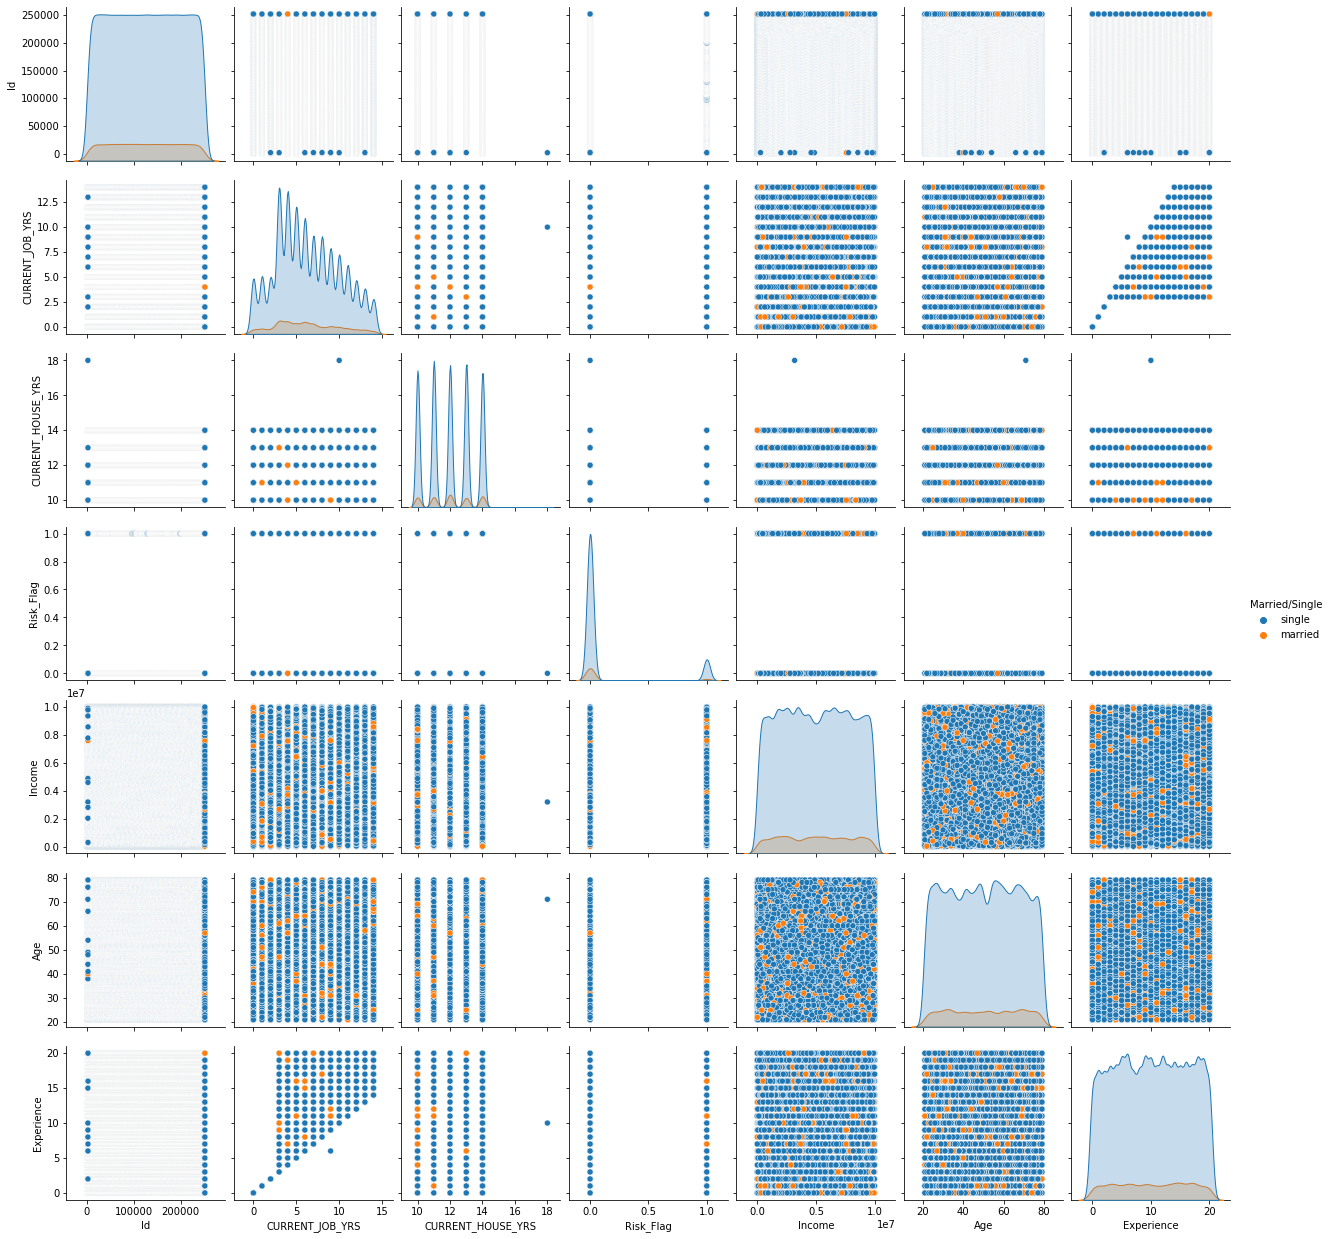

In [47]:
sns.pairplot(data, hue = 'Married/Single');

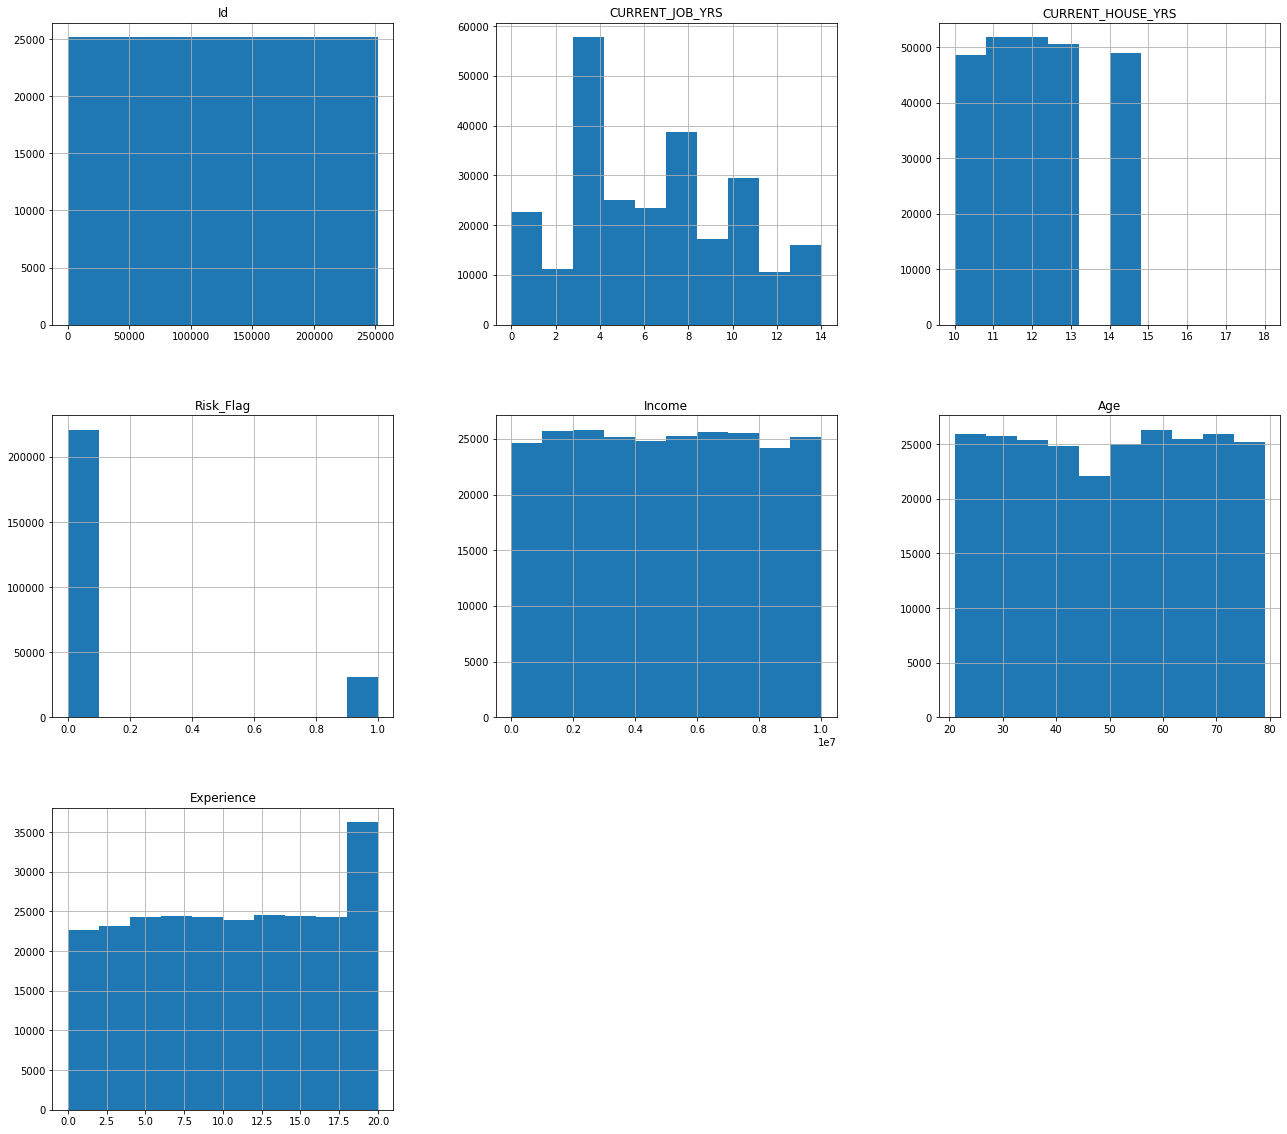

In [48]:
data.hist( figsize = (22, 20) )
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


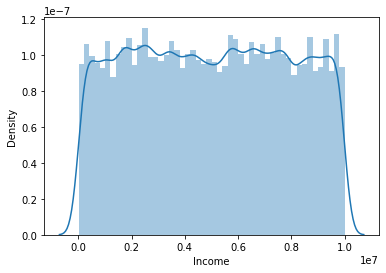

In [49]:
sns.distplot(data["Income"], kde = True);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


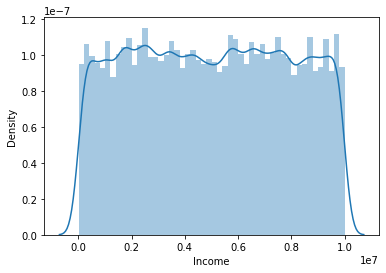

In [50]:
sns.distplot(data["Income"], kde = True);

In [51]:
data["Risk_Flag"].value_counts()

0    220952
1     30992
Name: Risk_Flag, dtype: int64

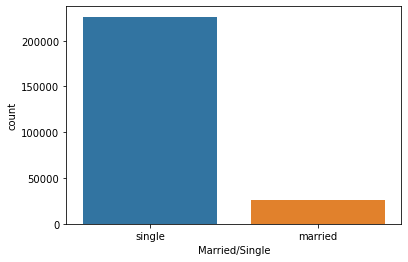

In [52]:
sns.countplot(data=data, x = 'Married/Single');

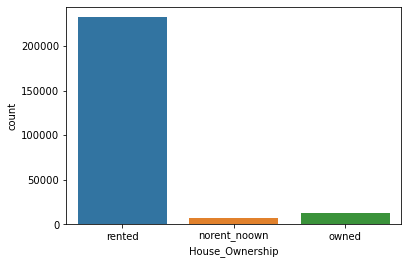

In [53]:
sns.countplot(data=data, x = 'House_Ownership');

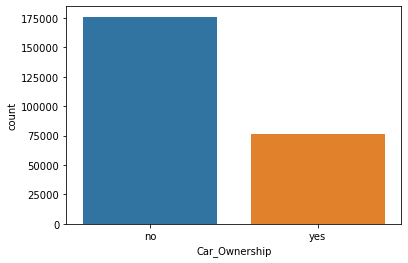

In [54]:
sns.countplot(data=data, x = 'Car_Ownership');

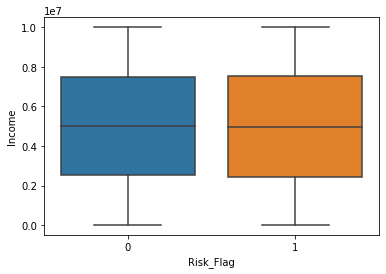

In [55]:
sns.boxplot(x ="Risk_Flag",y="Income" ,data = data);

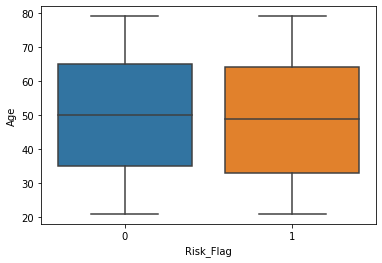

In [56]:
sns.boxplot(x ="Risk_Flag",y="Age" ,data = data);

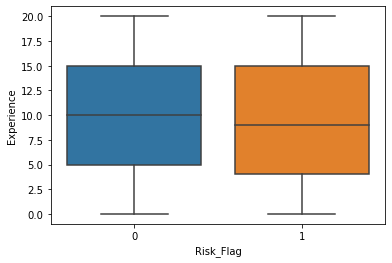

In [57]:
sns.boxplot(x ="Risk_Flag",y="Experience" ,data = data);

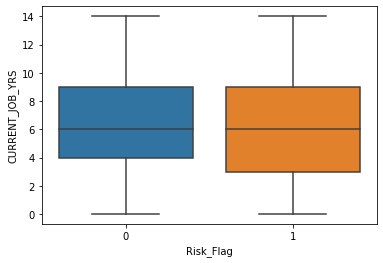

In [58]:
sns.boxplot(x ="Risk_Flag",y="CURRENT_JOB_YRS" ,data = data);

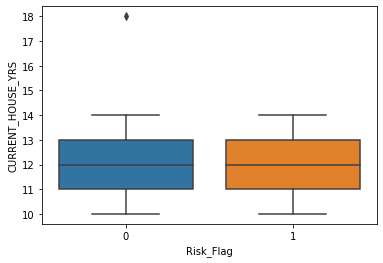

In [59]:
sns.boxplot(x ="Risk_Flag",y="CURRENT_HOUSE_YRS" ,data = data);

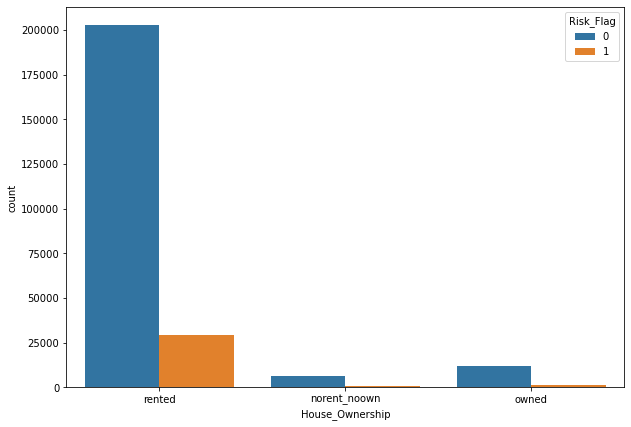

In [60]:
plt.figure(figsize=[10,7])
sns.countplot(data=data, x='House_Ownership', hue='Risk_Flag');

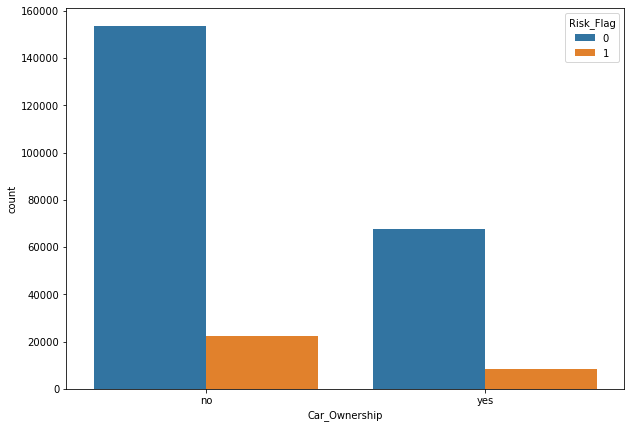

In [61]:
plt.figure(figsize=[10,7])
sns.countplot(data=data, x='Car_Ownership', hue='Risk_Flag');

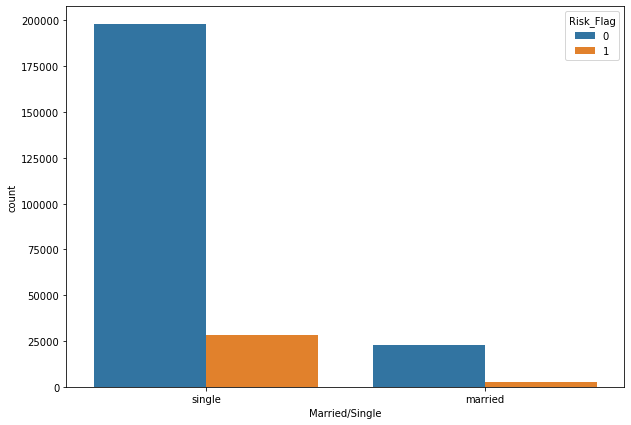

In [62]:
plt.figure(figsize=[10,7])
sns.countplot(data=data, x='Married/Single', hue='Risk_Flag');

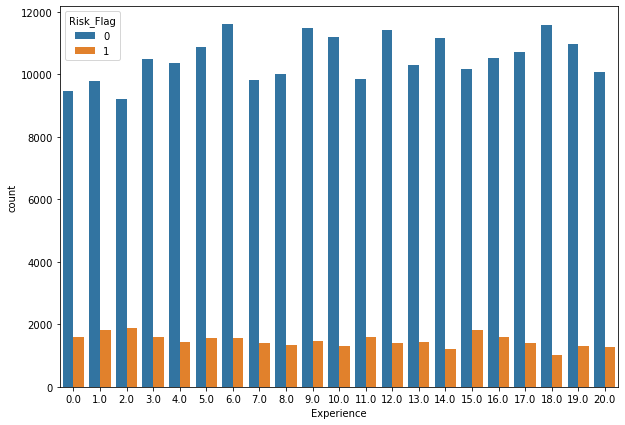

In [63]:
plt.figure(figsize=[10,7])
sns.countplot(data=data, x='Experience', hue='Risk_Flag');

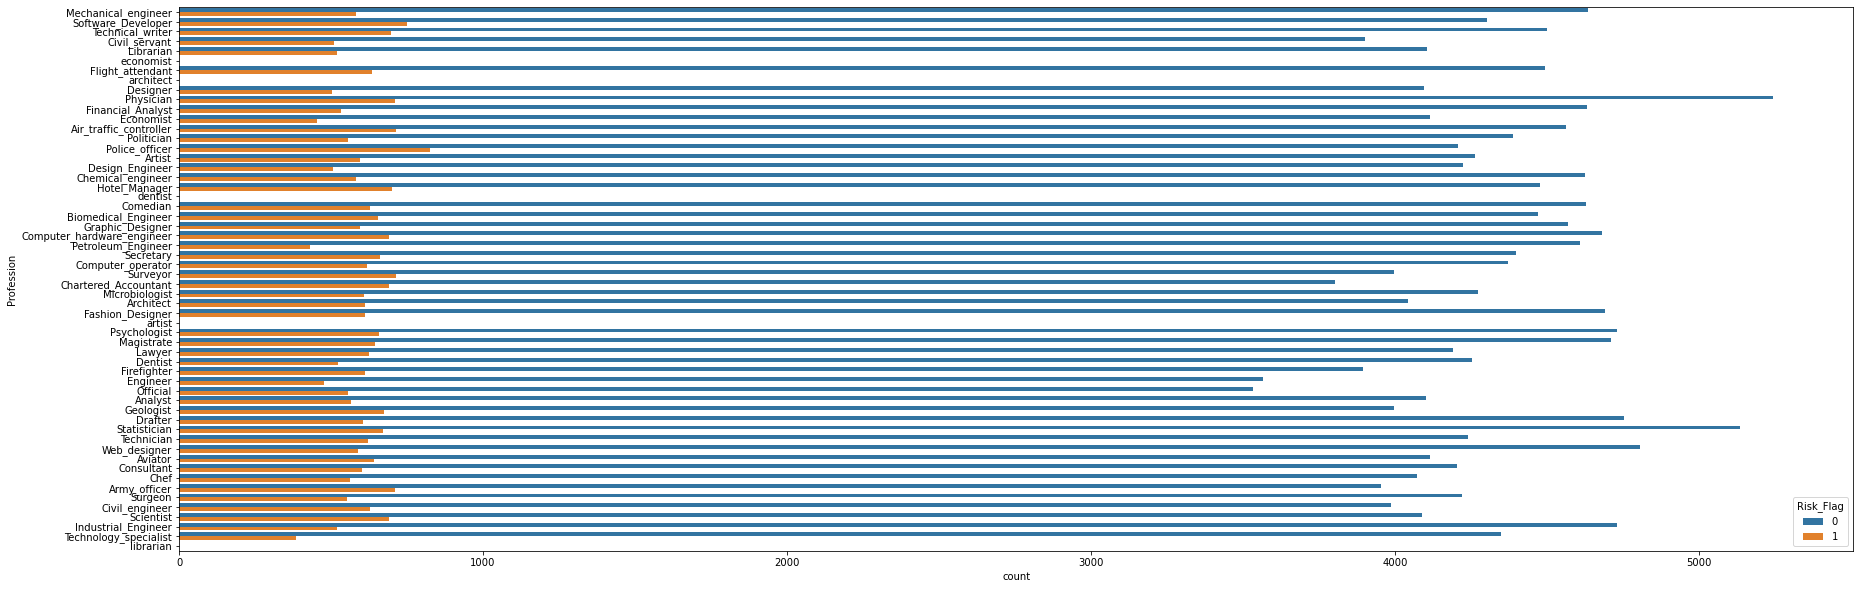

In [64]:
plt.figure(figsize=[30,10])
sns.countplot(data=data, y='Profession', hue='Risk_Flag');

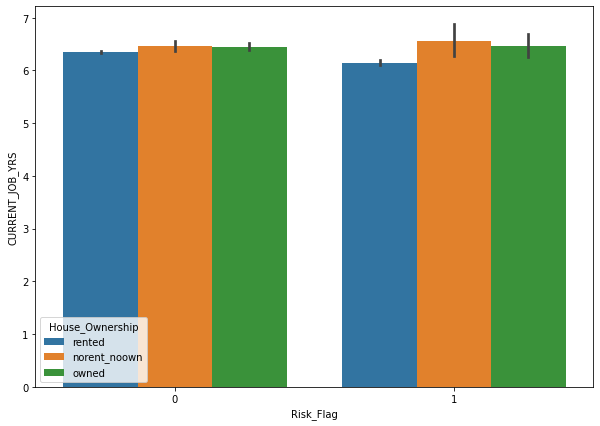

In [65]:
plt.figure(figsize=[10,7])
sns.barplot(x = "Risk_Flag", y = "CURRENT_JOB_YRS", hue='House_Ownership', data = data);

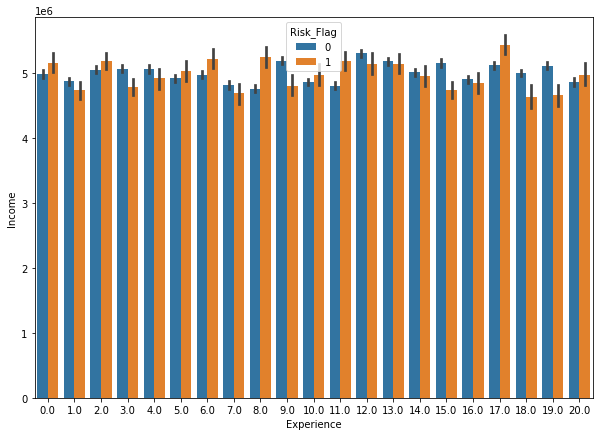

In [66]:
plt.figure(figsize=[10,7])
sns.barplot(x = "Experience", y = "Income", hue='Risk_Flag', data = data);

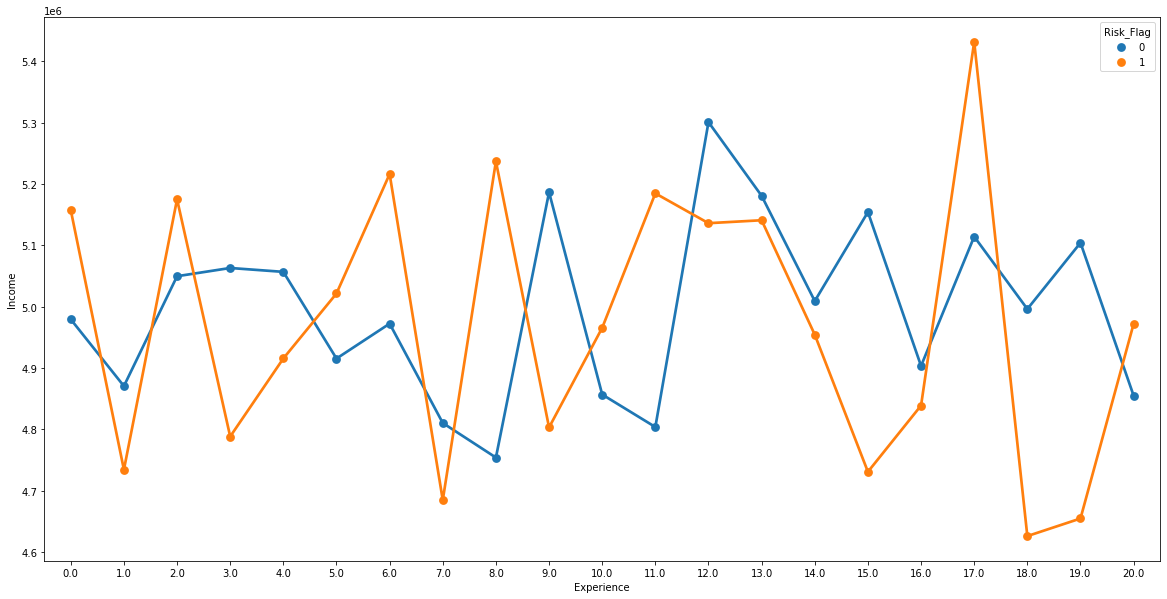

In [67]:
plt.figure(figsize=[20,10])
sns.pointplot(data=data, x="Experience", y="Income", hue='Risk_Flag', ci = None);

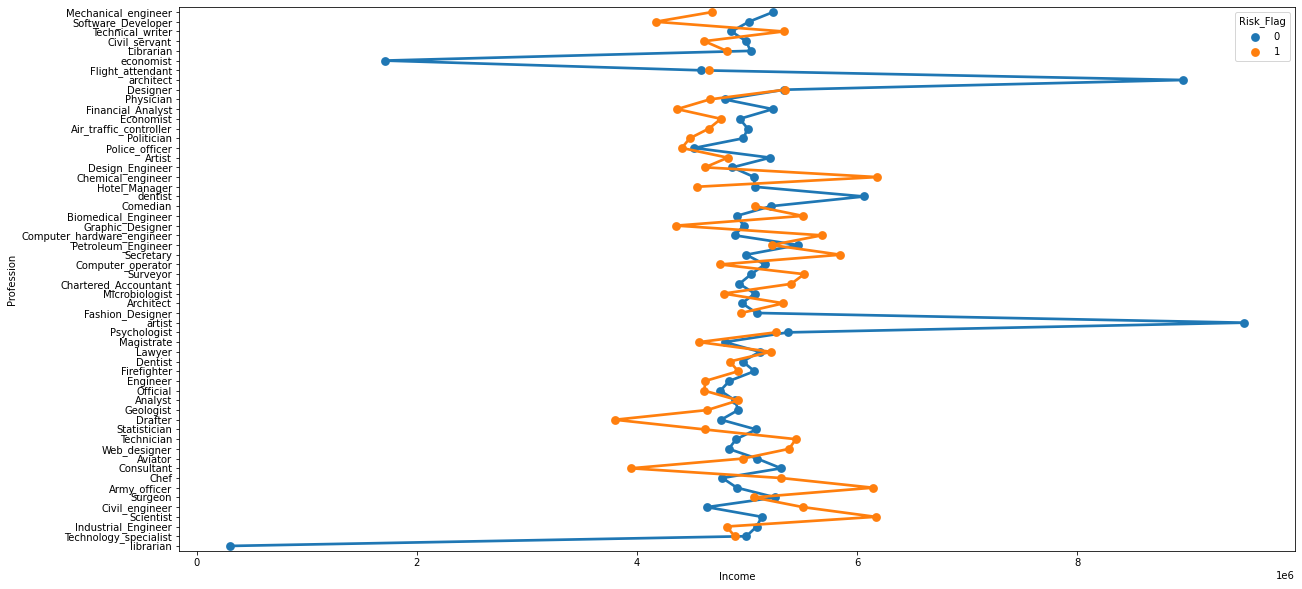

In [68]:
plt.figure(figsize=[20,10])
sns.pointplot(data=data, y="Profession", x="Income", hue='Risk_Flag', ci = None);

# Modelling Phase

In [43]:
label_encoder = LabelEncoder()

for col in ['Married/Single','Car_Ownership']:
    data[col] = label_encoder.fit_transform( data[col] )

In [44]:
onehot_encoder = OneHotEncoder(sparse = False)
data['House_Ownership'] = onehot_encoder.fit_transform(data['House_Ownership'].values.reshape(-1, 1) )

In [45]:
high_card_features = ['Profession', 'CITY', 'STATE']

count_encoder = ce.CountEncoder()

# Transform the features, rename the columns with the _count suffix, and join to dataframe
count_encoded = count_encoder.fit_transform( data[high_card_features] )
data = data.join(count_encoded.add_suffix("_count"))

In [46]:
data= data.drop(labels=['Profession', 'CITY', 'STATE'], axis=1)

In [104]:
x = data.drop(['Risk_Flag'], axis = 1)
y = data['Risk_Flag']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=7)

In [129]:
RFC = RandomForestClassifier(criterion='gini',bootstrap=False ,random_state=15)
RandomForestPipeline = Pipeline([('myscaler',MinMaxScaler()),
                     ('mypca',PCA(n_components=3)),
                     ('myclassifier',RFC)])

In [130]:
data.head()

,Id,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Income,Age,Experience,Married/Single,Profession_count,CITY_count,STATE_count
0,1,0.0,0,3.0,13.0,0,1303834.0,23.0,3.0,1,5217,798,14118
1,2,0.0,0,9.0,13.0,0,7574516.0,40.0,10.0,1,5053,848,25558
2,3,0.0,0,4.0,10.0,0,3991815.0,66.0,4.0,0,5196,688,5803
3,4,0.0,1,2.0,12.0,1,6256451.0,41.0,2.0,1,5053,607,4658
4,5,0.0,0,3.0,14.0,1,5768871.0,47.0,11.0,1,4413,809,16533


In [131]:
RandomForestPipeline.fit(x_train, y_train)

Pipeline(steps=[('myscaler', MinMaxScaler()), ('mypca', PCA(n_components=3)),
                ('myclassifier',
                 RandomForestClassifier(bootstrap=False, random_state=15))])

In [132]:
y_pred = RandomForestPipeline.predict(x_test)

In [133]:
print("-------------------------TEST SCORES-----------------------") 
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

-------------------------TEST SCORES-----------------------
Recall: 0.38874639307470343
Precision: 0.5822328931572629
Accuracy: 0.8897973764115183


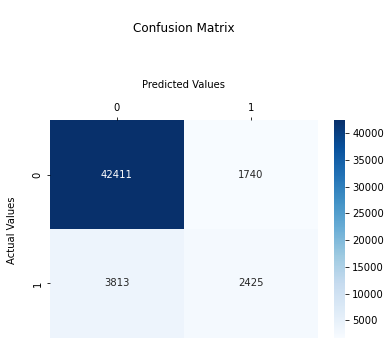

In [134]:
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True, 
            fmt='1', cmap='Blues')
ax.set_title('\nConfusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values\n') 
ax.xaxis.set_label_position('top')
ax.set_ylabel('Actual Values \n');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.xaxis.tick_top() 
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()